# The Power of Clean Electricity: Grocery Store Carbon Emissions in Seattle

[[grocery stores are really bad for the planet, blah blah]] [[cite data]]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_gbq

In [6]:
# Fetch data for all Seattle buildings > 40k sq ft

query = """
    SELECT *
    FROM `GHGE_buildings_data.building-benchmark`;
"""

all_buildings_dataframe = pandas_gbq.read_gbq(query, project_id='seattle-377109')

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████|


## Find grocery stores

In [7]:
all_buildings_dataframe.head()

,OSEBuildingID,TaxParcelIdentificationNumber,DataYear,BuildingType,BuildingName,Owner,CouncilDistrictCode,Neighborhood,Units,YearBuilt,...,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Outlier,ComplianceIssue,ComplianceStatus,Comments,DefaultData,LegislationPropertyType
0,50148,7733600135,2020,NonResidential,RESIDENCE INN SEATTLE U,TMUD GSL LLC,4,NORTHEAST,None,2016,...,Parking,54695,None,<NA>,None,No Issue,Compliant,None,None,Hotel
1,50150,1991200090,2020,NonResidential,HYATT HOUSE,HH SEATTLE LLC,1,LAKE UNION,None,2016,...,Parking,28069,None,<NA>,None,No Issue,Compliant,None,None,Hotel
2,50160,659000775,2020,NonResidential,AMAZON DOPPLER BUILDING,ACORN DEVELOPMENT LLC,7,DOWNTOWN,None,2016,...,Parking,448625,Convention Center,59672,None,No Issue,Compliant,None,None,Office
3,50166,4083306985,2020,NonResidential,TABLEAU (NORTH EDGE),BRE-BMR 34TH LLC,1,LAKE UNION,None,2016,...,Parking,117684,Restaurant,2839,None,No Issue,Compliant,None,None,Office
4,50192,660001605,2020,NonResidential,MIDTOWN 21 (AMAZON),MIDTOWN21 LLC,1,DOWNTOWN,None,2016,...,Parking,110813,None,<NA>,None,No Issue,Compliant,None,None,Office


In [11]:
all_buildings_dataframe.columns

Index(['OSEBuildingID', 'TaxParcelIdentificationNumber', 'DataYear',
       'BuildingType', 'BuildingName', 'Owner', 'CouncilDistrictCode',
       'Neighborhood', 'Units', 'YearBuilt', 'Address', 'City', 'State',
       'ZipCode', 'Latitude', 'Longitude', 'PrimaryPropertyType',
       'ListOfAllPropertyUseTypes', 'EPAPropertyType',
       'TotalGHGEmissions__metric_tons_', 'ENERGYSTARScore',
       'YearsENERGYSTARCertified', 'SiteEUI_kBtu_sf_', 'SiteEUIWN_kBtu_sf_',
       'SiteEnergyUse_kBtu_', 'SiteEnergyUseWN_kBtu_', 'SourceEUI_kBtu_sf_',
       'SourceEUIWN_kBtu_sf_', 'GHGEmissionsIntensityKgSqFt',
       'NaturalGas_kBtu_', 'NaturalGas_therms_', 'Electricity_kBtu_',
       'Electricity_kWh_', 'SteamUse_kBtu_', 'OtherFuelUse_kBtu_',
       'PropertyGFATotal', 'PropertyGFABuilding_s_', 'PropertyGFAParking',
       'NumberofBuildings', 'NumberofFloors', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeG

In [8]:
all_buildings_dataframe['EPAPropertyType'].unique()

array(['Hotel', 'Office', 'K-12 School', 'Retail Store', 'Medical Office',
       'Other - Recreation', 'Multifamily HR (10+)',
       'Multifamily LR (1-4)', 'Multifamily MR (5-9)',
       'Supermarket/Grocery Store', 'Non-Refrigerated Warehouse',
       'Hospital (General Medical & Surgical)', 'Other', 'Museum',
       'Parking', 'Laboratory', 'Restaurant', 'Bank Branch',
       'Other - Mall', 'Unclassified', 'Enclosed Mall', 'Police Station',
       'Worship Facility', 'Convention Center', 'Mixed Use Property',
       'Multifamily Housing', 'Social/Meeting Hall',
       'Self-Storage Facility', 'Other/Specialty Hospital',
       'Residence Hall/Dormitory',
       'Other - Entertainment/Public Assembly',
       'Outpatient Rehabilitation/Physical Therapy', 'College/University',
       'Distribution Center', 'Residential Care Facility',
       'Manufacturing/Industrial Plant', 'Library', 'Courthouse',
       'Fire Station', 'Performing Arts', 'Prison/Incarceration',
       'Other - L

In [36]:
potential_groceries = all_buildings_dataframe[all_buildings_dataframe['EPAPropertyType'].isin(['Supermarket/Grocery Store', 'Refrigerated Warehouse', 'Wholesale Club/Supercenter'])]

potential_groceries[['OSEBuildingID', 'BuildingName', 'EPAPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA']]

,OSEBuildingID,BuildingName,EPAPropertyType,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA
51,50195,TOTAL WINE AND MORE,Supermarket/Grocery Store,Supermarket/Grocery Store,25763,None,<NA>
637,26473,Q F C,Supermarket/Grocery Store,Supermarket/Grocery Store,31174,None,<NA>
1112,20045,2746 NE 45TH ST - QFC,Supermarket/Grocery Store,Supermarket/Grocery Store,96218,None,<NA>
1113,21921,SAFEWAY STORE # 488,Supermarket/Grocery Store,Supermarket/Grocery Store,34982,Parking,0
1114,24493,METROPOLITAN MARKET,Supermarket/Grocery Store,Supermarket/Grocery Store,24377,None,<NA>
1170,50415,PORT OF SEATTLE- TERMINAL 115 (CAMPUS),Refrigerated Warehouse,Refrigerated Warehouse,358706,Non-Refrigerated Warehouse,49885
1279,22230,THE BALLARD MARKET,Supermarket/Grocery Store,Supermarket/Grocery Store,29214,None,<NA>
1280,22240,SAFEWAY STORE # 1477,Supermarket/Grocery Store,Supermarket/Grocery Store,47034,Parking,0
1281,49946,QFC - Ballard,Supermarket/Grocery Store,Supermarket/Grocery Store,41198,None,<NA>
1362,599,Uwajimaya (Seattle 5),Refrigerated Warehouse,Refrigerated Warehouse,76354,None,<NA>


In [37]:
# None of the refridgerated warehouses are grocery stores, so we'll remove them.
potential_groceries = potential_groceries[potential_groceries['EPAPropertyType'] != 'Refrigerated Warehouse']

# Lowe's is a hardware store, not a grocery. Let's remove it.
potential_groceries = potential_groceries[potential_groceries['OSEBuildingID'] != 514]

In [40]:
# Some of the grocery stores have secondary uses (retail store, parking)
# Because the data doesn't distinguish emissions from different parts of a building, we will restrict to single-use buildings

potential_groceries['SecondLargestPropertyUseTypeGFA'] = potential_groceries['SecondLargestPropertyUseTypeGFA'].fillna(0)

single_use_grocery_stores = potential_groceries[potential_groceries['SecondLargestPropertyUseTypeGFA'] == 0]

single_use_grocery_stores.head()

,OSEBuildingID,TaxParcelIdentificationNumber,DataYear,BuildingType,BuildingName,Owner,CouncilDistrictCode,Neighborhood,Units,YearBuilt,...,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Outlier,ComplianceIssue,ComplianceStatus,Comments,DefaultData,LegislationPropertyType
51,50195,2771600911,2020,NonResidential,TOTAL WINE AND MORE,1550 ARMORY LLC,1,MAGNOLIA / QUEEN ANNE,None,2016,...,None,0,None,<NA>,None,No Issue,Compliant,None,None,Supermarket/Grocery Store
637,26473,4083802815,2020,NonResidential,Q F C,DAMBROSIO ENTERPRISES LLC,1,LAKE UNION,NOT_FOUND,1957,...,None,0,None,<NA>,None,No Issue,Compliant,None,None,Supermarket/Grocery Store
1112,20045,925049330,2020,NonResidential,2746 NE 45TH ST - QFC,QUALITY FOOD CENTERS INC,1,NORTHEAST,NOT_FOUND,1955,...,None,0,None,<NA>,None,No Issue,Compliant,None,None,Self-Storage Facility
1113,21921,2437200030,2020,NonResidential,SAFEWAY STORE # 488,SAFEWAY INC,4,NORTHEAST,NOT_FOUND,1975,...,Parking,0,None,<NA>,None,No Issue,Compliant,None,None,Supermarket/Grocery Store
1114,24493,7974700270,2020,NonResidential,METROPOLITAN MARKET,PAJIS WA L L C,4,NORTHEAST,NOT_FOUND,1973,...,None,0,None,<NA>,None,No Issue,Compliant,None,None,Supermarket/Grocery Store


In [89]:
seattle_grocery_stores_env_impact = single_use_grocery_stores[['OSEBuildingID', 'BuildingName', 'PropertyGFABuilding_s_', 'TotalGHGEmissions__metric_tons_', 'GHGEmissionsIntensityKgSqFt', 'Electricity_kWh_', 'Electricity_kBtu_', 'NaturalGas_kBtu_', 'NaturalGas_therms_', 'SteamUse_kBtu_', 'OtherFuelUse_kBtu_']]

seattle_grocery_stores_env_impact.sort_values('TotalGHGEmissions__metric_tons_', ascending=False)[:10]

,OSEBuildingID,BuildingName,PropertyGFABuilding_s_,TotalGHGEmissions__metric_tons_,GHGEmissionsIntensityKgSqFt,Electricity_kWh_,Electricity_kBtu_,NaturalGas_kBtu_,NaturalGas_therms_,SteamUse_kBtu_,OtherFuelUse_kBtu_
3290,464,COSTCO 4TH AVE S,158415,529.0,3.3,4078974,13917459,8567611,85676,0,None
2975,500,FRED MEYER LAKE CITY,121087,423.0,3.5,2544354,8681336,7096095,70961,0,None
1280,22240,SAFEWAY STORE # 1477,46068,405.3,8.8,1943709,6631935,6968000,69680,0,None
1815,25914,SAFEWAY STORE # 1551,44739,375.0,8.4,2701494,9217498,6138700,61387,0,None
2093,732,FRED MEYER GREENWOOD,118133,365.2,3.1,3293683,11238046,5750448,57504,0,None
2175,607,SAFEWAY 1965,61053,354.9,5.8,2256600,7699519,5912008,59120,0,None
1961,27378,SAFEWAY STORE # 1550,38000,341.4,9.0,1970443,6723152,5755700,57557,0,None
2977,41928,SAFEWAY STORE #1586,51400,325.3,6.3,1677700,5724312,5551192,55512,0,None
1114,24493,METROPOLITAN MARKET,24377,321.1,13.2,1383365,4720041,5572911,55729,0,None
1112,20045,2746 NE 45TH ST - QFC,77424,306.7,4.0,2547445,8691882,4904319,49043,0,None


The [average US grocery store](https://www.epa.gov/sites/default/files/documents/gc_averagestoreprofile_final_june_2011_revised_1.pdf) is 46,000 sq ft and produces 1,383 metric tons of greenhouse gas a year.

In [62]:
avg_grocery_size = 46000.0
avg_grocery_ghge = 1383.0
avg_grocery_emissions_intensity_kg_sqft = (avg_grocery_ghge / avg_grocery_size) * 1000

print('Average US grocery store emissions intensity (kg/sq ft):')
print(round(avg_grocery_emissions_intensity_kg_sqft, 2))

Average US grocery store emissions intensity (kg/sq ft):
30.07


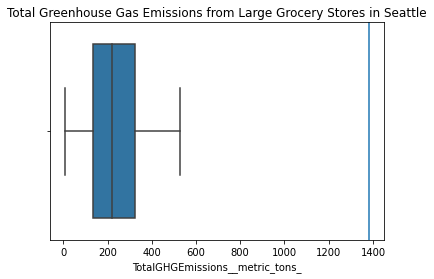

In [80]:
sns.boxplot(x=seattle_grocery_stores_env_impact['TotalGHGEmissions__metric_tons_'])
plt.axvline(x=avg_grocery_ghge)
plt.title('Total Greenhouse Gas Emissions from Large Grocery Stores in Seattle')
plt.show()

### label the mean?? and the quartiles??

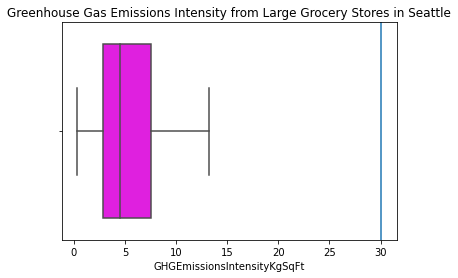

In [81]:
sns.boxplot(x=seattle_grocery_stores_env_impact['GHGEmissionsIntensityKgSqFt'], color='magenta')
plt.axvline(x=30.07)
plt.title('Greenhouse Gas Emissions Intensity from Large Grocery Stores in Seattle')
plt.show()

In [60]:
seattle_avg_grocery_emissions_intensity_kg_sqft = np.mean(seattle_grocery_stores_env_impact['GHGEmissionsIntensityKgSqFt'])

### make this rounded
print(f'The average US grocery store has a greenhouse gas emissions intensity of {round(avg_grocery_emissions_intensity_kg_sqft, 2)} kg/sq ft per year.')

print(f'That is {round(avg_grocery_emissions_intensity_kg_sqft / seattle_avg_grocery_emissions_intensity_kg_sqft, 2)} times the Seattle average of {round(seattle_avg_grocery_emissions_intensity_kg_sqft, 2)} kg/sq ft per year.')

The average US grocery store has a greenhouse gas emissions intensity of 30.07 kg/sq ft per year.
That is 6.16 times the Seattle average of 4.88 kg/sq ft per year.


On average, Seattle's grocery stores are producing about a sixth of the greenhouse gas emissions of a typical US grocery store.

## What makes Seattle's grocery stores cleaner than other stores?

What is the total GHGE from Seattle's grocery stores?

In [5]:
total_seattle_grocery_ghge = seattle_grocery_stores_env_impact['TotalGHGEmissions__metric_tons_'].sum()

print(f'Seattle grocery stores produce {round(total_seattle_grocery_ghge, 1)} metric tons of greenhouse gas emissions each year.')

Seattle grocery stores produce 6807.9 metric tons of greenhouse gas emissions each year.


Now let's find out where Seattle's grocery stores' emissions come from.

In [6]:
seattle_grocery_energy_sources = pd.DataFrame(data={
    'electric_kbtu': [seattle_grocery_stores_env_impact['Electricity_kBtu_'].sum()],
    'gas_kbtu': [seattle_grocery_stores_env_impact['NaturalGas_kBtu_'].sum()],
    'steam_kbtu': [seattle_grocery_stores_env_impact['SteamUse_kBtu_'].sum()],
    'other_kbtu': [seattle_grocery_stores_env_impact['OtherFuelUse_kBtu_'].sum()]
})
seattle_grocery_energy_sources

,electric_kbtu,gas_kbtu,steam_kbtu,other_kbtu
0,181882719.0,109977944.0,0,0.0


Seattle's groceries use only electric and gas power. So we can discount steam and miscellaneous power sources as sources of emissions.

### What is the average emission factor from electric power in the data?

Let's see if we can calculate the emissions from Seattle City light by using the city's own emissions data.

Process:
1. Find any and all electric-only buildings in the GHGE dataset.
1. Calculate metric CO2/kWh with this data and then take the average.

In [131]:
electric_only_buildings = all_buildings_dataframe.query('NaturalGas_kBtu_ == 0 & SteamUse_kBtu_ == 0 & OtherFuelUse_kBtu_ == 0')

electric_only_buildings[['TotalGHGEmissions__metric_tons_', 'Electricity_kWh_']].head()

,TotalGHGEmissions__metric_tons_,Electricity_kWh_
8,14.5,798732
9,7.9,433032
10,2.6,142774
15,3.8,211756
16,3.6,199573


In [132]:
electric_only_buildings['electric_co2_m3_kwh'] = electric_only_buildings['TotalGHGEmissions__metric_tons_'] / electric_only_buildings['Electricity_kWh_']

/var/folders/dv/sn1_d0xn0vncjbncdpkkg_pc0000gn/T/ipykernel_55810/1019057827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_only_buildings['electric_co2_m3_kwh'] = electric_only_buildings['TotalGHGEmissions__metric_tons_'] / electric_only_buildings['Electricity_kWh_']


In [166]:
electric_only_buildings['electric_co2_m3_kwh'] = electric_only_buildings['electric_co2_m3_kwh'].astype(np.float64)

/var/folders/dv/sn1_d0xn0vncjbncdpkkg_pc0000gn/T/ipykernel_55810/3179569723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_only_buildings['electric_co2_m3_kwh'] = electric_only_buildings['electric_co2_m3_kwh'].astype(np.float64)


In [167]:
electric_only_buildings['electric_co2_m3_kwh'].describe()

count    1.177000e+03
mean     1.813865e-05
std      1.474555e-07
min      1.654041e-05
25%      1.807664e-05
50%      1.814099e-05
75%      1.821060e-05
max      1.910260e-05
Name: electric_co2_m3_kwh, dtype: float64

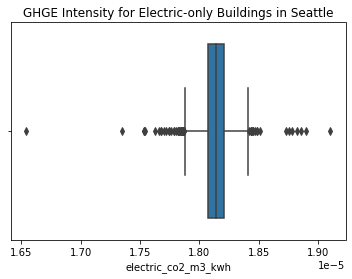

In [168]:
sns.boxplot(x=electric_only_buildings['electric_co2_m3_kwh'])
plt.title('GHGE Intensity for Electric-only Buildings in Seattle')
plt.show()

So something is off with the data. 

Looking at the histogram, we see there are a lot of outlier data points. Electricity-produced GHGE should be the same for every building. This is because the dataset measures based on the number of kWh used by reading the meter, without consideration to the building's efficiency. (Any building-specific energy efficient factors would appear in this data set as reduced power use.)

Let's see what happens when we use the official emissions factors.

### Seattle Grocery Store Emissions

From the [summary report](https://www.seattle.gov/documents/Departments/OSE/Seattle%20Energy%20Benchmarking%20Analysis%202016%20for%20web.pdf), the emissions factors for each type of power are:

- Seattle City Light: 20.08 lbs. CO2/MWh
- Steam from Enwave: 170.17 lbs. CO2/MBtu
- Gas from Portfolio Manager: 53.11 kg CO2/MBtu

Convert these factors to metric tons per KWh and kBtu:

In [10]:
city_light_factor_lbs_mwh = 20.08
city_light_factor_tons_mwh = city_light_factor_lbs_mwh / 2204.62
city_light_factor_tons_kwh = city_light_factor_tons_mwh / 1000

city_light_factor_tons_kwh

9.108145621467645e-06

In [13]:
gas_factor_kg_mbtu = 53.11
gas_factor_tons_mbtu = gas_factor_kg_mbtu / 1000
gas_factor_tons_kbtu = gas_factor_tons_mbtu / 1000

gas_factor_tons_kbtu

5.311e-05

In [9]:
total_seattle_grocery_ghge = seattle_grocery_stores_env_impact['TotalGHGEmissions__metric_tons_'].sum()

total_seattle_grocery_ghge

6807.900000000001

In [19]:
electric_impact_est = seattle_grocery_stores_env_impact['Electricity_kWh_'].sum() * city_light_factor_tons_kwh
electric_impact_est

485.52587841895655

In [20]:
gas_impact_est = seattle_grocery_stores_env_impact['NaturalGas_kBtu_'].sum() * gas_factor_tons_kbtu
gas_impact_est

5840.928605839999

In [22]:
print('Gap between estimate and actual emissions (metric tons):')
total_seattle_grocery_ghge - electric_impact_est - gas_impact_est

Gap between estimate and actual emissions (metric tons):


481.4455157410448

## How much is each grocery store off?

If this is a rounding error, we would expect each store to be off by the same amount.

Method:
1. Estimate the expected GHGE based on the emissions factors provided in the city's report (see above).
2. Calculate the difference between the estimated and actual emissions.

In [16]:
seattle_grocery_stores_env_impact['estimated_ghge'] = (seattle_grocery_stores_env_impact['Electricity_kWh_'] * city_light_factor_tons_kwh) + (seattle_grocery_stores_env_impact['NaturalGas_kBtu_'] * gas_factor_tons_kbtu)
seattle_grocery_stores_env_impact['percent_diff_estimated_real_ghge'] = (seattle_grocery_stores_env_impact['TotalGHGEmissions__metric_tons_'] - seattle_grocery_stores_env_impact['estimated_ghge']) / seattle_grocery_stores_env_impact['TotalGHGEmissions__metric_tons_']

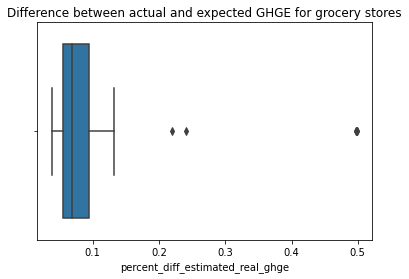

In [17]:
sns.boxplot(x=seattle_grocery_stores_env_impact['percent_diff_estimated_real_ghge'])
plt.title('Difference between actual and expected GHGE for grocery stores')
plt.show()

In [18]:
seattle_grocery_stores_env_impact['percent_diff_estimated_real_ghge'].describe()

count    31.000000
mean      0.132923
std       0.149466
min       0.039000
25%       0.054714
50%       0.069303
75%       0.094124
max       0.498366
Name: percent_diff_estimated_real_ghge, dtype: float64

## OK, what's going on?

Options:
- Reread report on how this data is collected
- What is the error from rounding?